In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("bmw.csv")
df['year'] = df['year'].astype('str')
display(df.head())
display(df.info())
display(df.describe())

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  object 
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 758.2+ KB


None

,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,123456.000000,214000.000000,580.000000,470.800000,6.600000


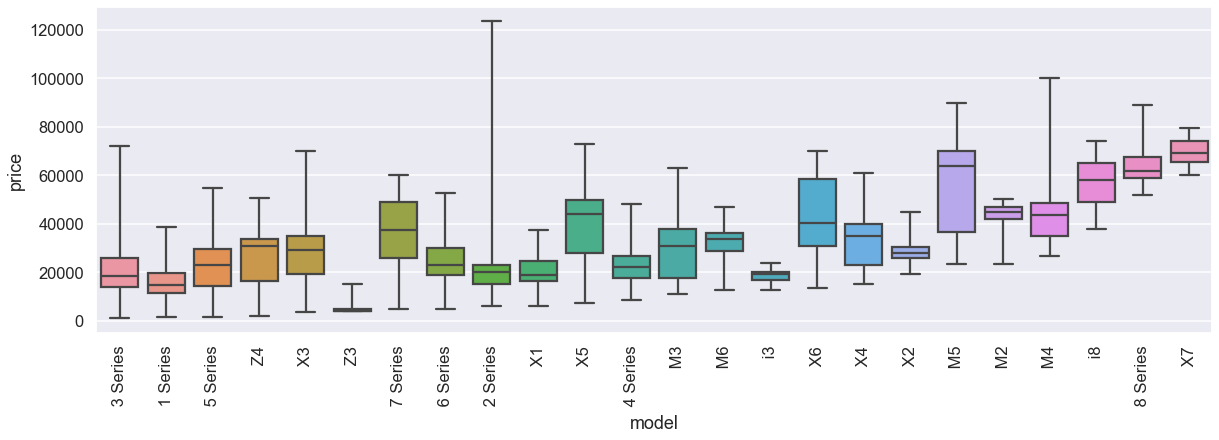

In [3]:
plt.figure(figsize=(20,6))
sns.boxplot(x='model', y='price', data=df.sort_values(by='price'), whis=np.inf)
plt.xticks(rotation=90)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1196: RuntimeWarning: invalid value encountered in double_scala

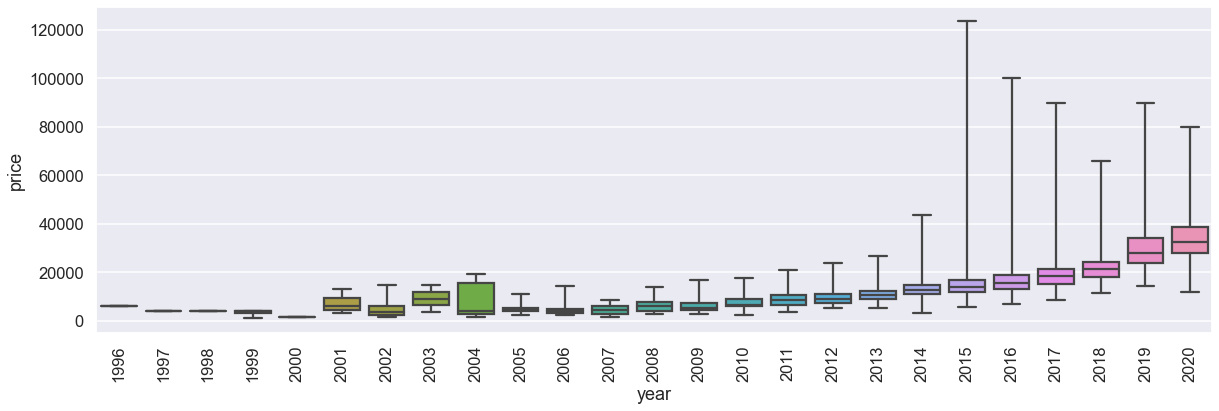

In [4]:
plt.figure(figsize=(20,6))
sns.boxplot(x='year', y='price', data=df.sort_values(by='year'), whis=np.inf)
plt.xticks(rotation=90)
plt.show()

In [5]:
# plt.figure(figsize=(20,6))
# sns.swarmplot(x='transmission', y='price', data=df)
# sns.boxplot(x='transmission', y='price', data=df, whis=np.inf)
# # plt.xticks(rotation=90)
# plt.show()

In [6]:
# plt.figure(figsize=(20,6))
# sns.violinplot(x='transmission', y='price', data=df)
# sns.swarmplot(x='transmission', y='price', data=df, color='white')
# # plt.xticks(rotation=90)
# plt.show()

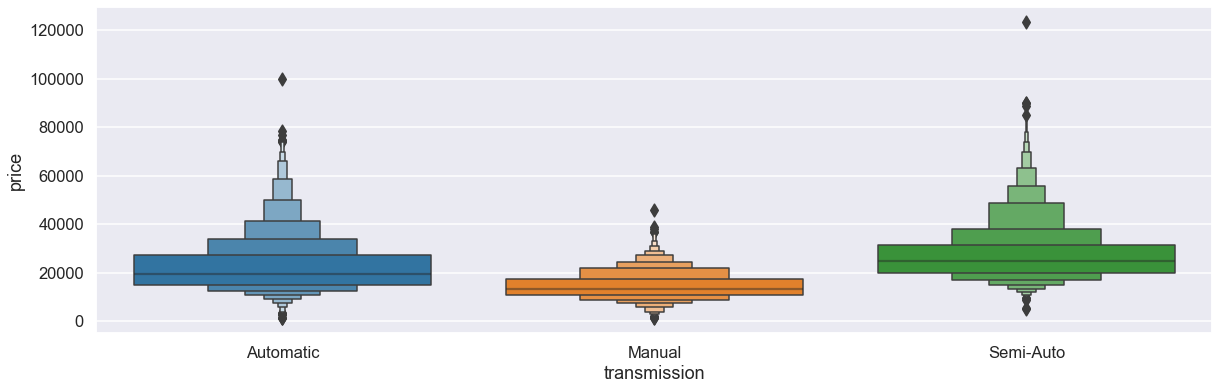

In [7]:
plt.figure(figsize=(20,6))
# sns.violinplot(x='transmission', y='price', data=df)
sns.boxenplot(x='transmission', y='price', data=df)
# plt.xticks(rotation=90)
plt.show()

- How many models are there?
- What's the most expensive car?
- What's the oldest car?
- Which one is the best mpg car?

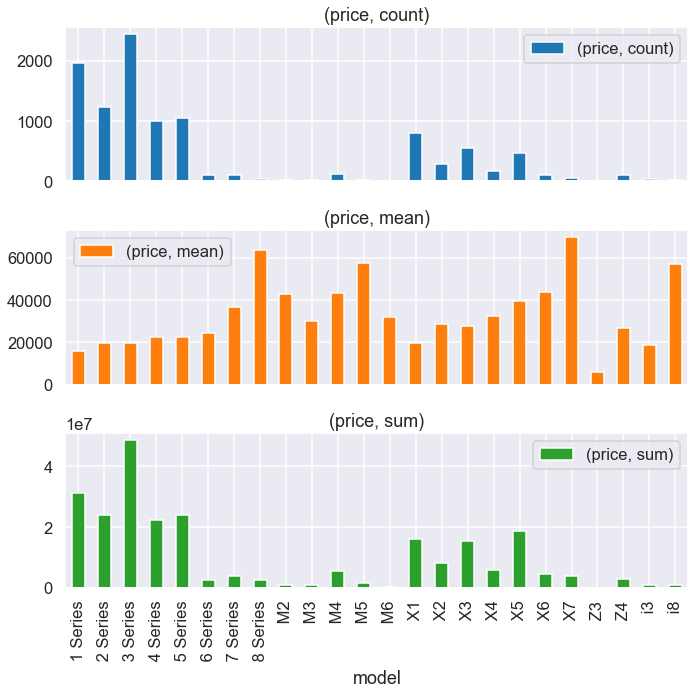

In [8]:
car_models_sum = df.groupby('model')[['price']].agg(['count', 'mean', 'sum']).round(2)

# car_models_sum = car_models_sum.reset_index()
# display(car_models_sum)

car_models_sum.plot(kind='bar', subplots=True, figsize=(10,10))
plt.tight_layout()
plt.show()

In [9]:
# plt.figure(figsize=(20,5))
# sns.barplot(y=('price', 'sum'), x='model', data=car_models_sum.sort_values(by=('price', 'sum'), ascending=False))

# plt.xticks(rotation=90)
# plt.show()

In [10]:
def unique_val(dataframe, col):

    data = pd.DataFrame(dataframe[col].value_counts())
    data = data.reset_index()
    data = data.rename(columns={col:'no of cars', 'index':col})
    data['% of cars'] = np.round(data['no of cars']/data['no of cars'].sum(), 4)*100
    data = data.sort_values('% of cars', ascending=False)
    display(data.head())
    
    return data

In [11]:
def annotate_bars(splot):
    for p in splot.patches:
        splot.annotate(format(round(p.get_height()), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, -12), 
                       textcoords = 'offset points')

In [12]:
transmission = unique_val(df, 'transmission')
model = unique_val(df, 'model')
fuelType = unique_val(df, 'fuelType')

,transmission,no of cars,% of cars
0,Semi-Auto,4666,43.28
1,Automatic,3588,33.28
2,Manual,2527,23.44


,model,no of cars,% of cars
0,3 Series,2443,22.66
1,1 Series,1969,18.26
2,2 Series,1229,11.40
3,5 Series,1056,9.80
4,4 Series,995,9.23


,fuelType,no of cars,% of cars
0,Diesel,7027,65.18
1,Petrol,3417,31.69
2,Hybrid,298,2.76
3,Other,36,0.33
4,Electric,3,0.03


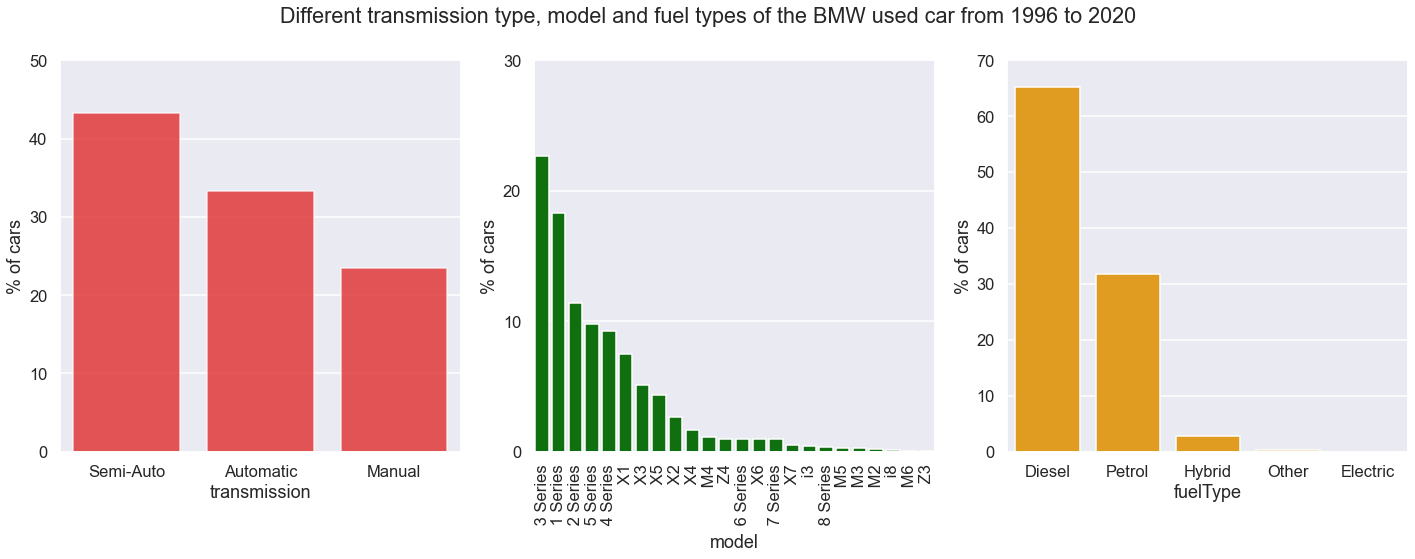

In [13]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
_ = sns.barplot(x='transmission', y='% of cars', data=transmission, color='red', alpha=0.75)
plt.yticks(np.arange(0, transmission['% of cars'].max()+10, 10).tolist())
# annotate_bars(_)

plt.subplot(1,3,2)
_ = sns.barplot(x='model', y='% of cars', data=model, color='green')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, model['% of cars'].max()+10, 10).tolist())
# annotate_bars(_)

plt.subplot(1,3,3)
_ = sns.barplot(x='fuelType', y='% of cars', data=fuelType, color='orange')
# annotate_bars(_)
plt.yticks(np.arange(0, fuelType['% of cars'].max()+10, 10).tolist())

plt.suptitle("Different transmission type, model and fuel types of the BMW used car from 1996 to 2020")
plt.tight_layout()
plt.show()

In [14]:
year = pd.DataFrame(df['year'].value_counts())
year = year.reset_index()
year = year.rename(columns={'year':'no of cars', 'index':'year'})
year['% of cars'] = np.round(year['no of cars']/year['no of cars'].sum(), 4)*100
year = year.sort_values('year', ascending=True)
display(year.head())

,year,no of cars,% of cars
22,1996,1,0.01
24,1997,1,0.01
23,1998,1,0.01
18,1999,4,0.04
21,2000,2,0.02


In [15]:
# df['cat'] = pd.cut(df['year'], 5, labels=["a", "b", "c", "d", "e"])
# # labels=["1996_2000", "2001_2005", "2006_2010", "2011_2015", "2016_2020"]
# display(df.head())

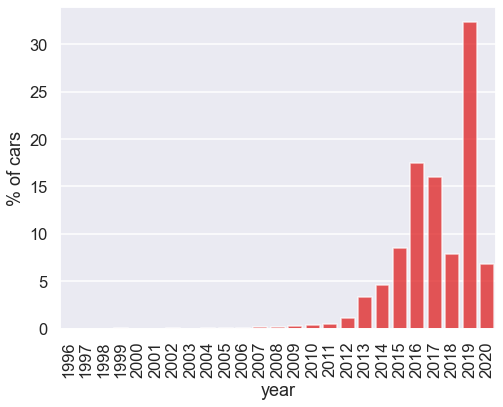

In [16]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.barplot(x='year', y='% of cars', data=year, color='red', alpha=0.75)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
numeric_cols = df.select_dtypes(include='number').columns
display(numeric_cols)

Index(['price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

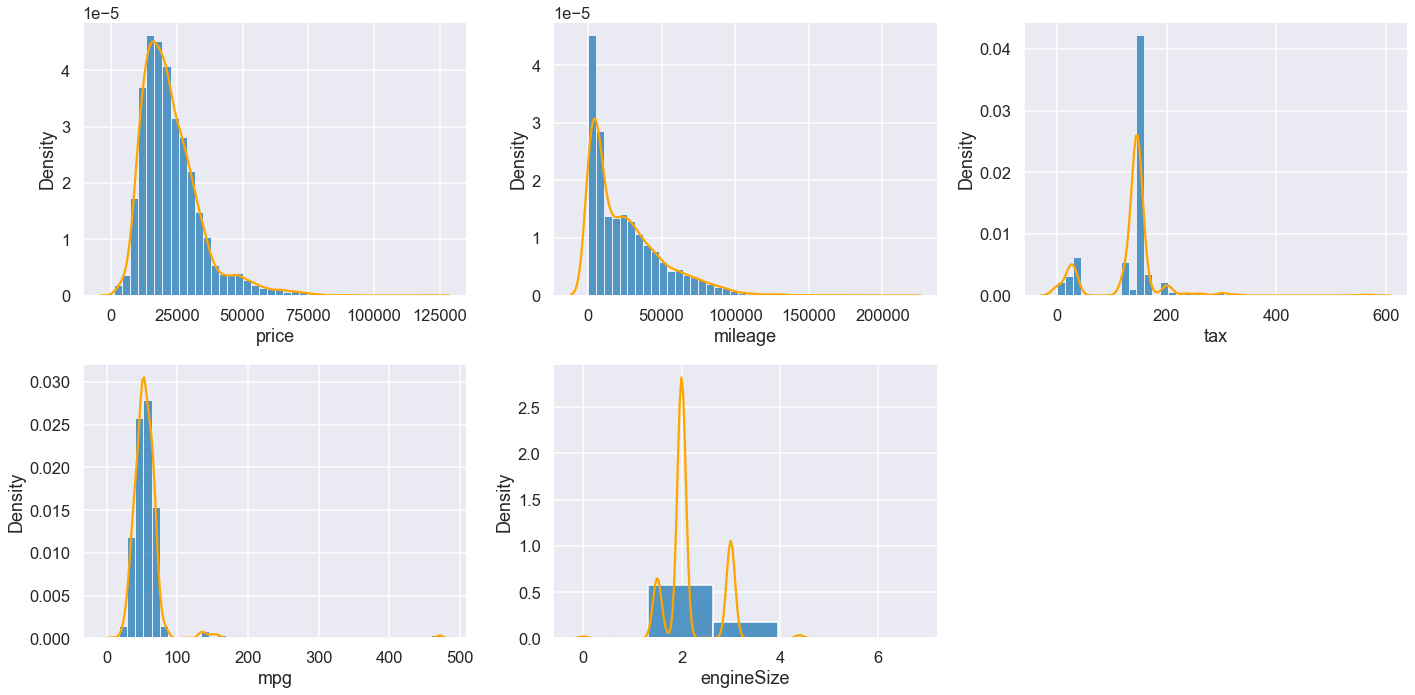

In [18]:
plt.figure(figsize=(20,10))
    
plt.subplot(2,3,1)
sns.histplot(x='price', data=df, bins=40, stat="density")
sns.kdeplot(x='price', data=df, color='orange')

plt.subplot(2,3,2)
sns.histplot(x='mileage', data=df, bins=40, stat="density")
sns.kdeplot(x='mileage', data=df, color='orange')

plt.subplot(2,3,3)
sns.histplot(x='tax', data=df, bins=40, stat="density")
sns.kdeplot(x='tax', data=df, color='orange')

plt.subplot(2,3,4)
sns.histplot(x='mpg', data=df, bins=40, stat="density")
sns.kdeplot(x='mpg', data=df, color='orange')

plt.subplot(2,3,5)
sns.histplot(x='engineSize', data=df, bins=5, stat="density")
sns.kdeplot(x='engineSize', data=df, color='orange')

plt.tight_layout()
plt.show()

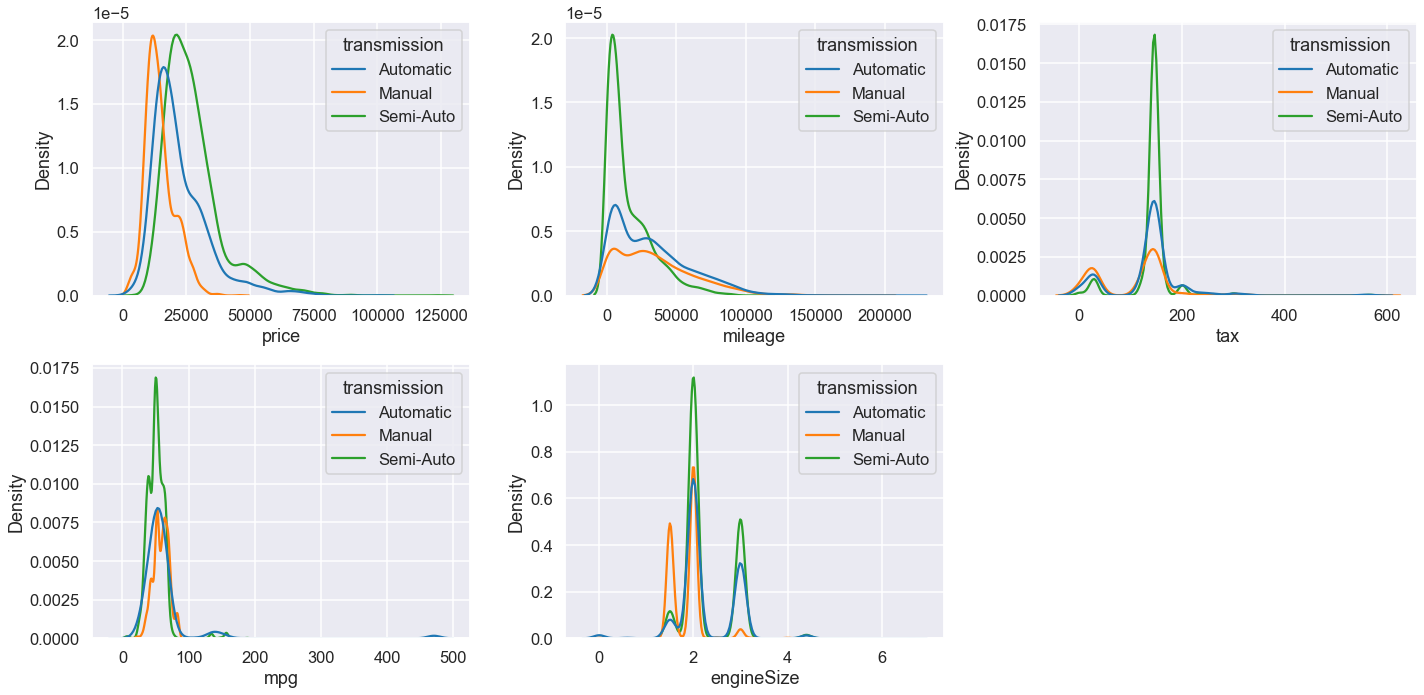

In [19]:
plt.figure(figsize=(20,10))
    
plt.subplot(2,3,1)
sns.kdeplot(x='price', data=df, hue='transmission')

plt.subplot(2,3,2)
sns.kdeplot(x='mileage', data=df, hue='transmission')

plt.subplot(2,3,3)
sns.kdeplot(x='tax', data=df, hue='transmission')

plt.subplot(2,3,4)
sns.kdeplot(x='mpg', data=df, hue='transmission')

plt.subplot(2,3,5)
sns.kdeplot(x='engineSize', data=df, hue='transmission')

plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


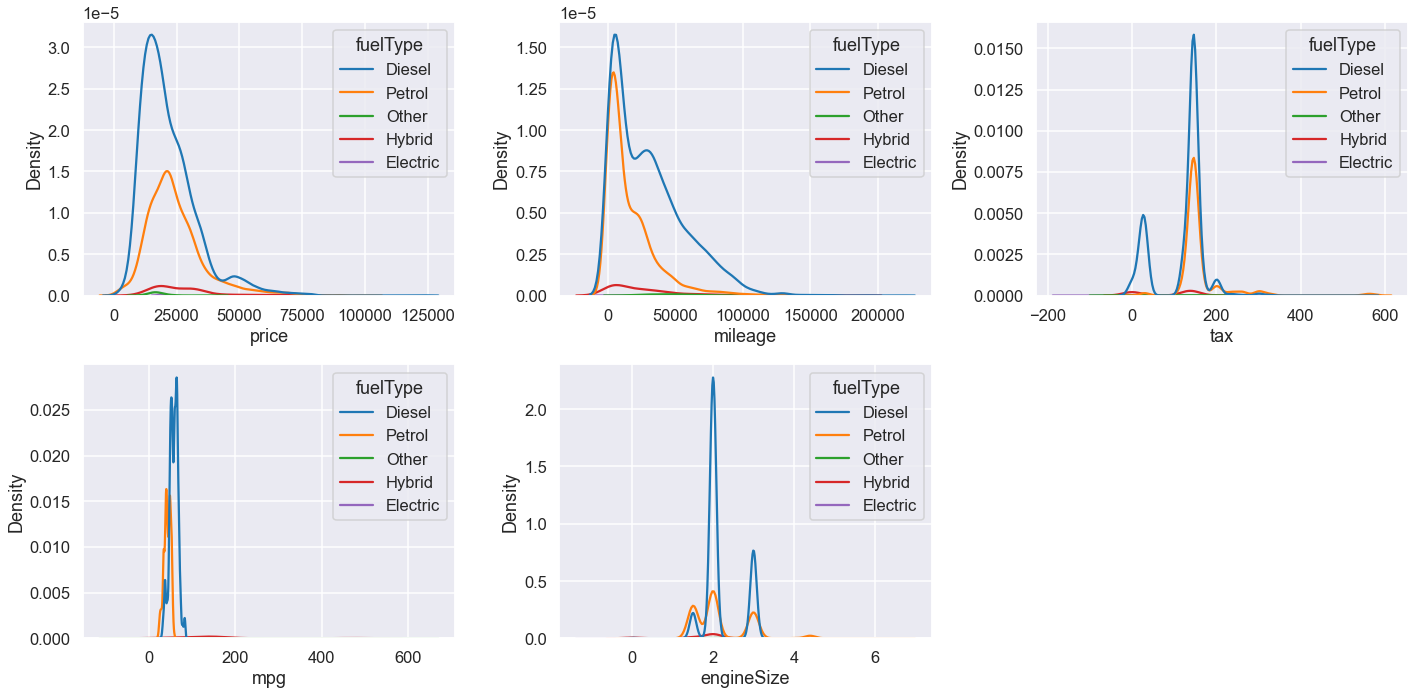

In [20]:
plt.figure(figsize=(20,10))
    
plt.subplot(2,3,1)
sns.kdeplot(x='price', data=df, hue='fuelType')

plt.subplot(2,3,2)
sns.kdeplot(x='mileage', data=df, hue='fuelType')

plt.subplot(2,3,3)
sns.kdeplot(x='tax', data=df, hue='fuelType')

plt.subplot(2,3,4)
sns.kdeplot(x='mpg', data=df, hue='fuelType')

plt.subplot(2,3,5)
sns.kdeplot(x='engineSize', data=df, hue='fuelType')

plt.tight_layout()
plt.show()

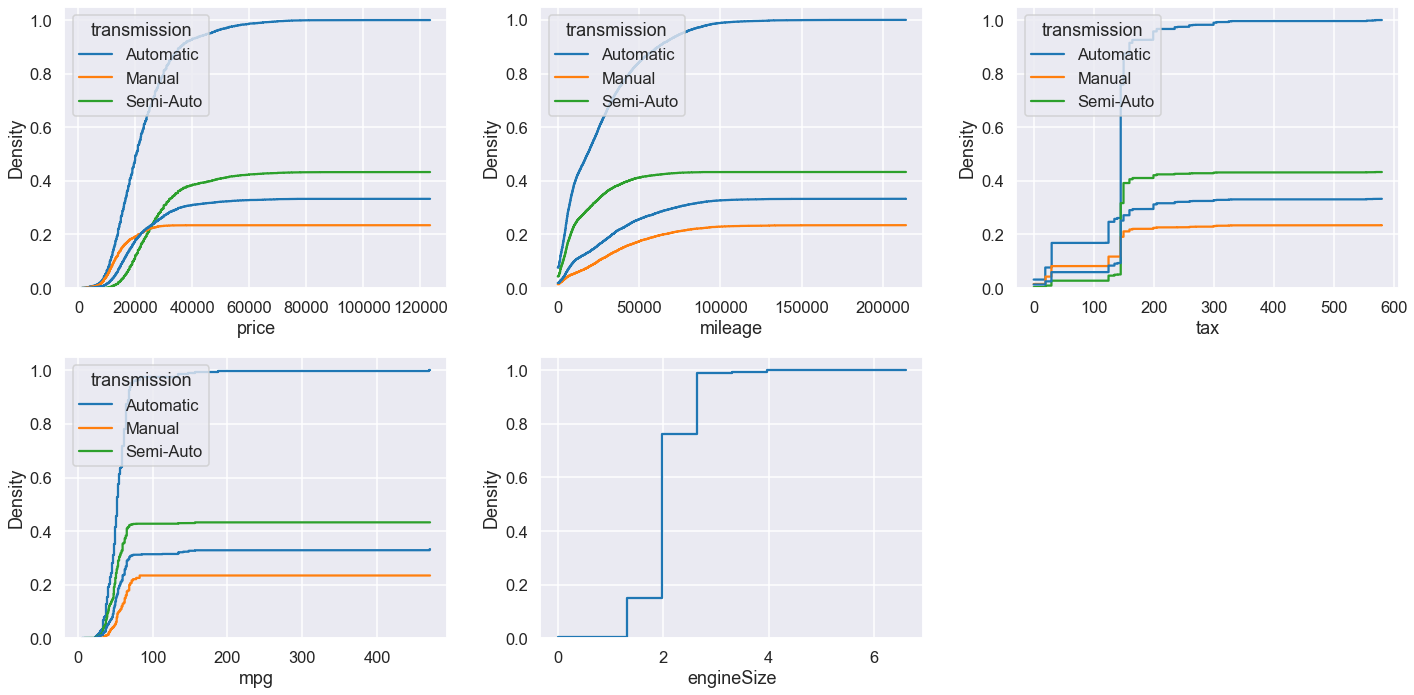

In [21]:
plt.figure(figsize=(20,10))
    
plt.subplot(2,3,1)
sns.histplot(x='price', data=df, bins=1000, stat="density", cumulative=True, fill=False, element="step")
sns.histplot(x='price', data=df, 
             bins=1000, stat="density", cumulative=True, fill=False, element="step", hue='transmission')

plt.subplot(2,3,2)
sns.histplot(x='mileage', data=df, bins=1000, stat="density", cumulative=True, fill=False, element="step")
sns.histplot(x='mileage', data=df, 
             bins=1000, stat="density", cumulative=True, fill=False, element="step", hue='transmission')

plt.subplot(2,3,3)
sns.histplot(x='tax', data=df, bins=600, stat="density", cumulative=True, fill=False, element="step")
sns.histplot(x='tax', data=df, 
             bins=1000, stat="density", cumulative=True, fill=False, element="step", hue='transmission')

plt.subplot(2,3,4)
sns.histplot(x='mpg', data=df, bins=500, stat="density", cumulative=True, fill=False, element="step")
sns.histplot(x='mpg', data=df, 
             bins=1000, stat="density", cumulative=True, fill=False, element="step", hue='transmission')

plt.subplot(2,3,5)
sns.histplot(x='engineSize', data=df, bins=10, stat="density", cumulative=True, fill=False, element="step")

plt.tight_layout()
plt.show()

In [22]:
# sns.histplot(df['transmission'], color='g', stat='probability')

In [23]:
# plt.figure(figsize=(20,20))
# sns.pairplot(df[numeric_cols], corner=True)

# plt.show()

In [24]:
df['Engine_Size'] = pd.cut(df['engineSize'], 
                           bins=[0,1,2,3,7], 
                           labels=["small", "medium", "large", "Extra_Large"])

df['road_tax_range'] = pd.cut(df['tax'], 
                           bins=[0, 150, 300, 450, 600], 
                           labels=["below_150", "150_300", "300_450", "450_600"])

df['mileage_range'] = pd.cut(df['mileage'],
                           bins=[0, 50000, 100000, 150000, 214000], 
                           labels=["Excellent", "Good", "Medium", "Bad"])

df['year'] = df['year'].astype('int')
df ['car_age'] = 2021 - df['year']
df['car_age_range'] = pd.cut(df['car_age'],
                           bins=[0, 5, 10, 15, 20, 25],
                           labels=["<=5", "5<age<=10", "10<age<=15", "15<age<=20", "20<age<=25"])

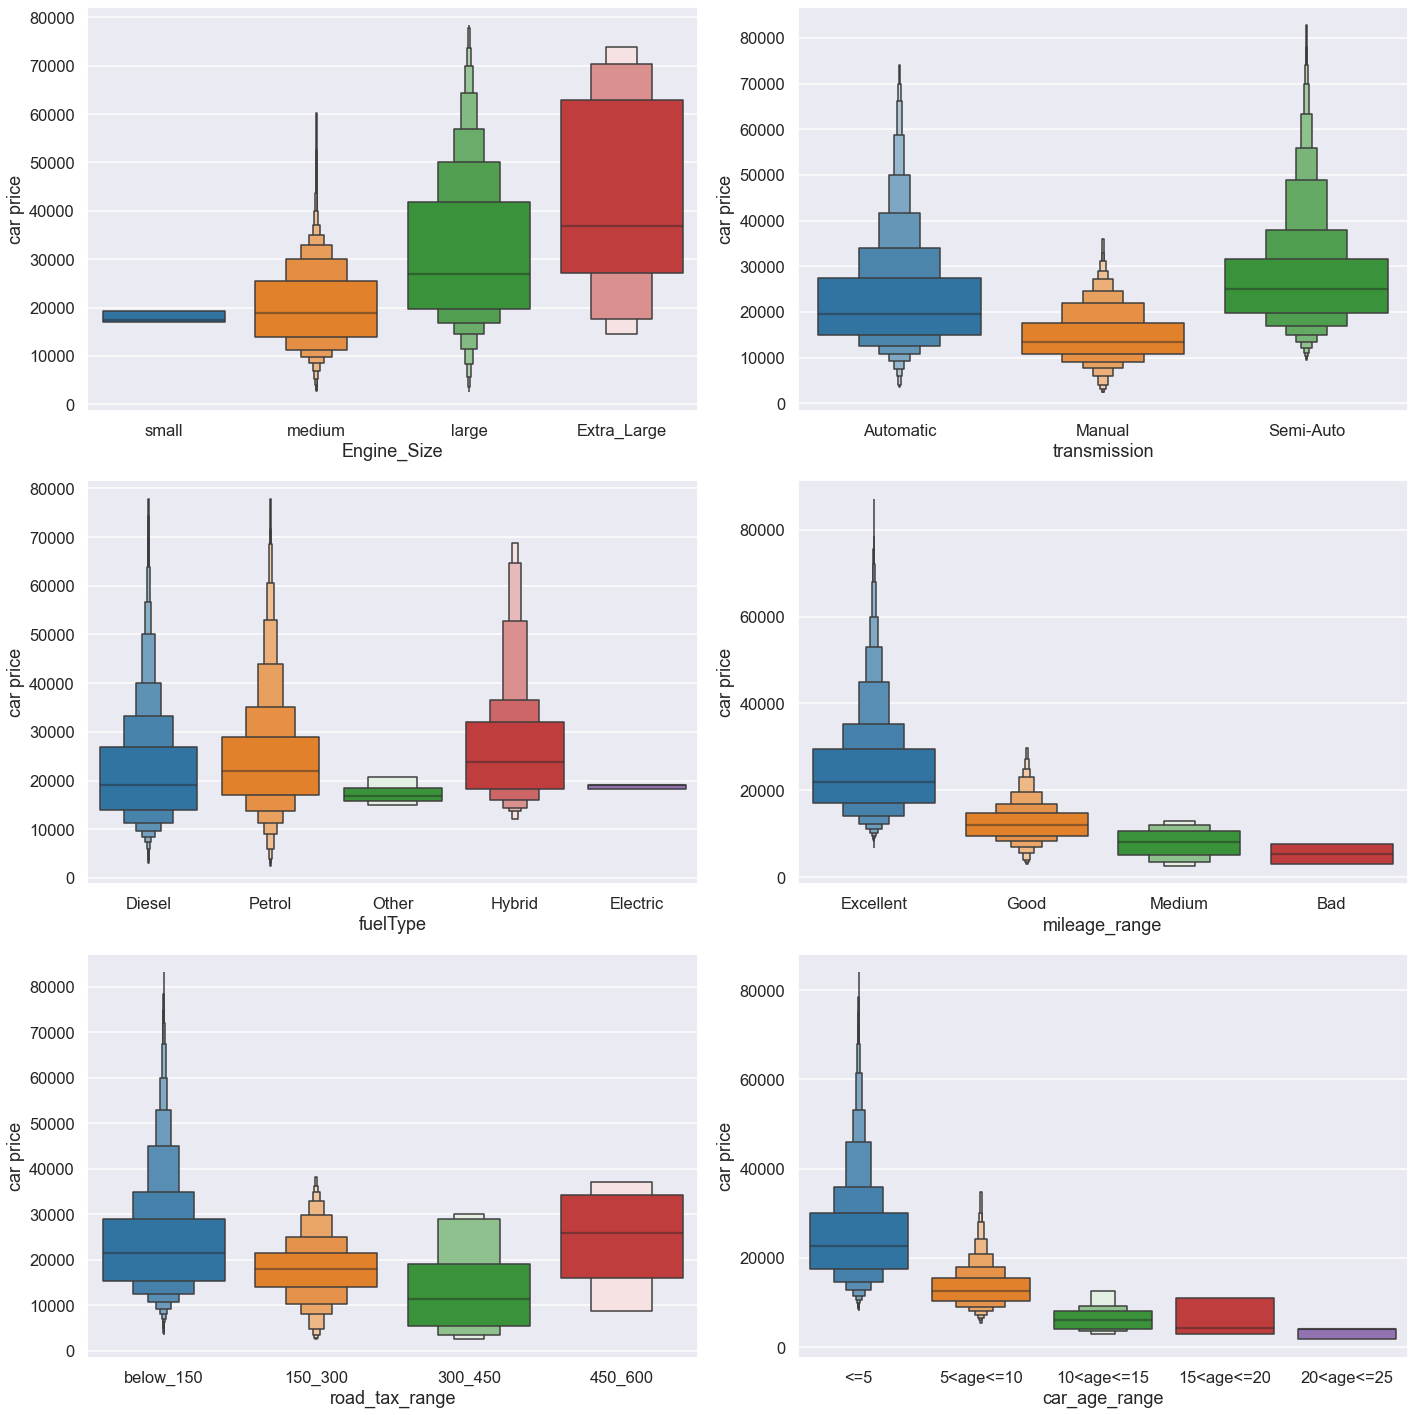

In [25]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
# sns.stripplot(x='Engine_Size', y='price', data=df)
sns.boxenplot(x='Engine_Size', y='price', data=df, showfliers=False)
plt.ylabel("car price")
# plt.title("box plot")

plt.subplot(3,2,2)
sns.boxenplot(x='transmission', y='price', data=df, showfliers=False)
plt.ylabel("car price")
# plt.title("swarm plot on top of a box plot")

plt.subplot(3,2,3)
sns.boxenplot(x='fuelType', y='price', data=df, showfliers=False)
plt.ylabel("car price")
# plt.title("violin plot")

plt.subplot(3,2,4)
sns.boxenplot(x='mileage_range', y='price', data=df, showfliers=False)
plt.ylabel("car price")
# plt.title("boxen plot")

plt.subplot(3,2,5)
sns.boxenplot(x='road_tax_range', y='price', data=df, showfliers=False)
plt.ylabel("car price")
# plt.title("boxen plot")

plt.subplot(3,2,6)
sns.boxenplot(x='car_age_range', y='price', data=df, showfliers=False)
plt.ylabel("car price")
# plt.title("boxen plot")

plt.tight_layout()
plt.show()

In [26]:
df.mpg.value_counts().sort_index()

5.5       6
8.8       8
19.1      1
20.8      1
21.9      2
         ..
141.3     4
148.7    41
156.9    47
188.3     5
470.8    43
Name: mpg, Length: 102, dtype: int64

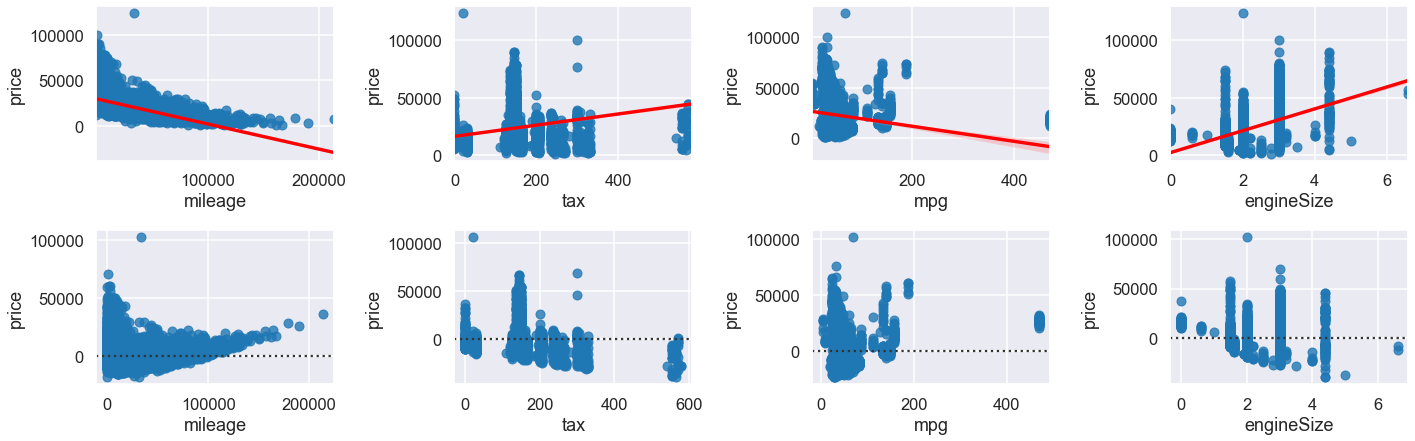

In [27]:
numeric_features = ['mileage', 'tax', 'mpg', 'engineSize']

target = 'price'

plt.figure(figsize=(20,12))
for i in range(len(numeric_features)):
    
    plt.subplot(4,4,i+1)
    sns.regplot(x=numeric_features[i], y=target, data=df, line_kws={"color": "red"})
    
    plt.subplot(4,4,i+5)
    sns.residplot(x=numeric_features[i], y=target, data=df)
    
plt.tight_layout()
plt.show()

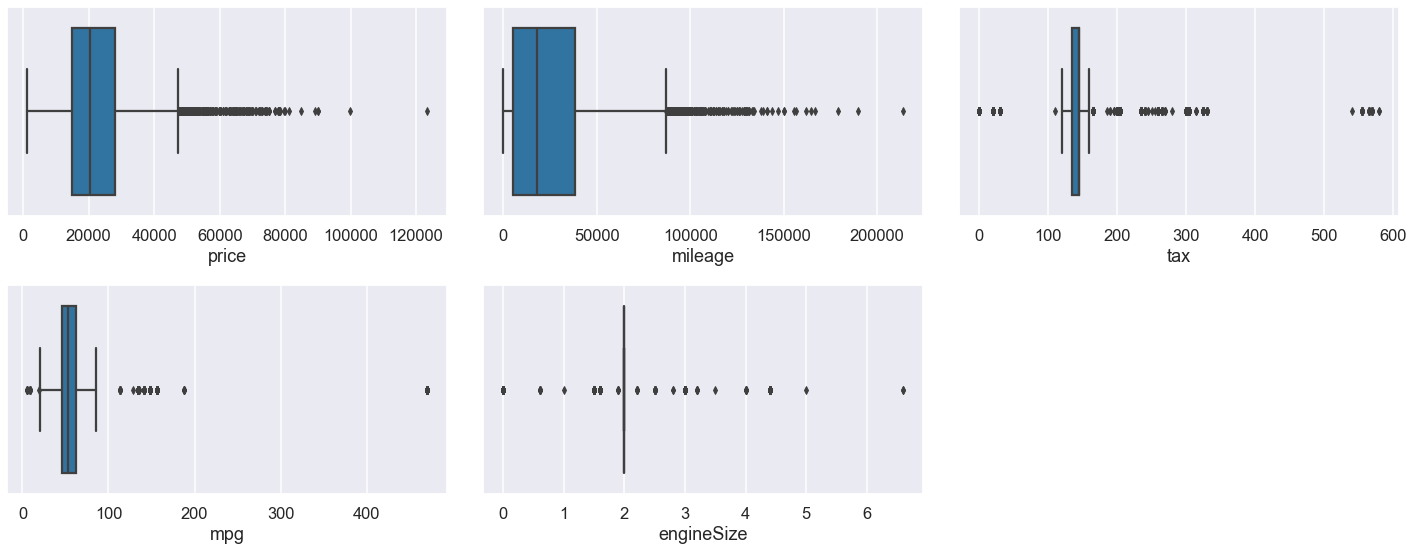

In [28]:
plt.figure(figsize=(20,8))
for i in range(len(numeric_cols)):
    
    plt.subplot(2,3,i+1)
    sns.boxplot(x=numeric_cols[i], data=df)
    
plt.tight_layout()   
plt.show()

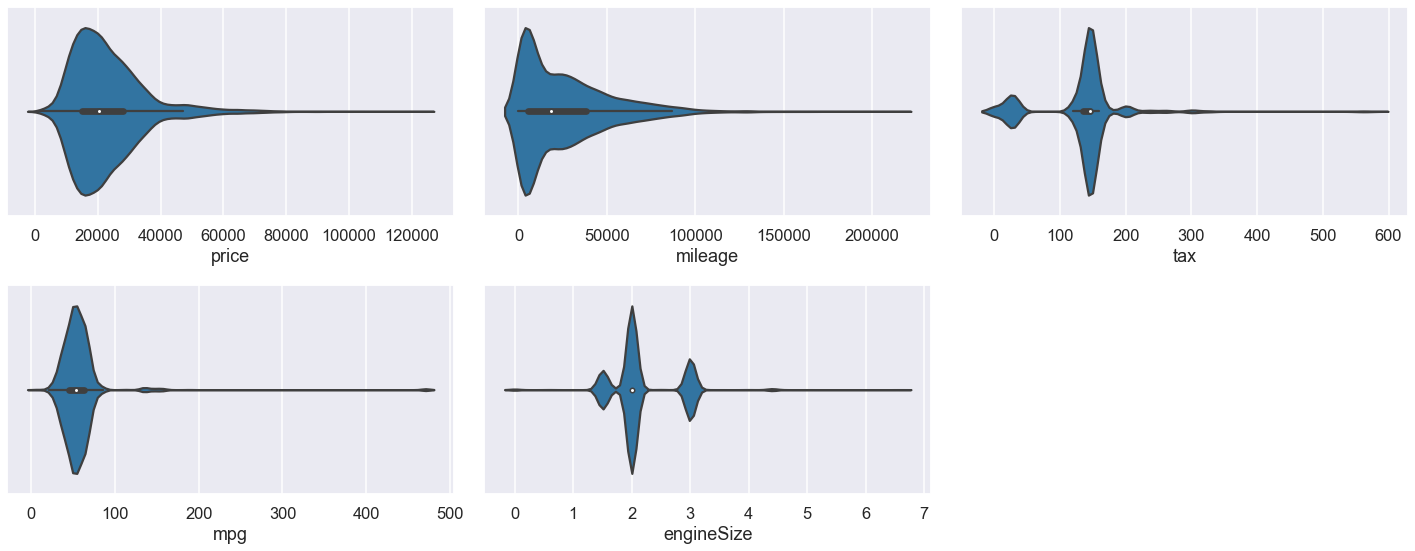

In [29]:
plt.figure(figsize=(20,8))
for i in range(len(numeric_cols)):
    
    plt.subplot(2,3,i+1)
    sns.violinplot(x=numeric_cols[i], data=df)
    
plt.tight_layout()   
plt.show()

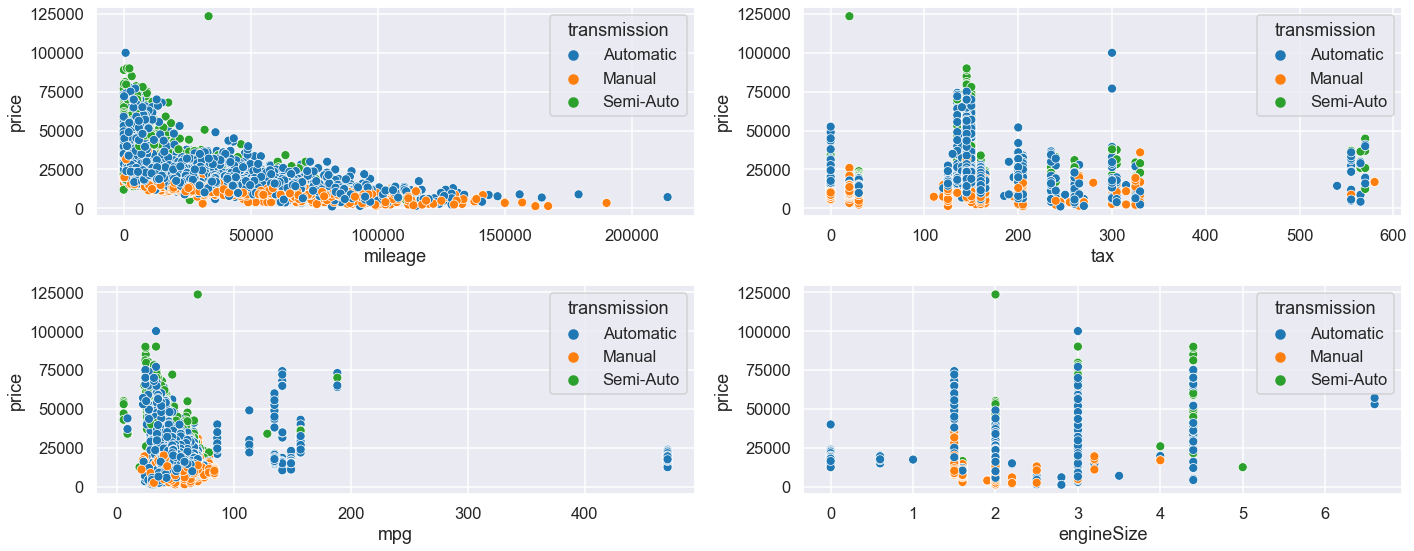

In [30]:
plt.figure(figsize=(20,8))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='transmission')
    
plt.tight_layout()   
plt.show()

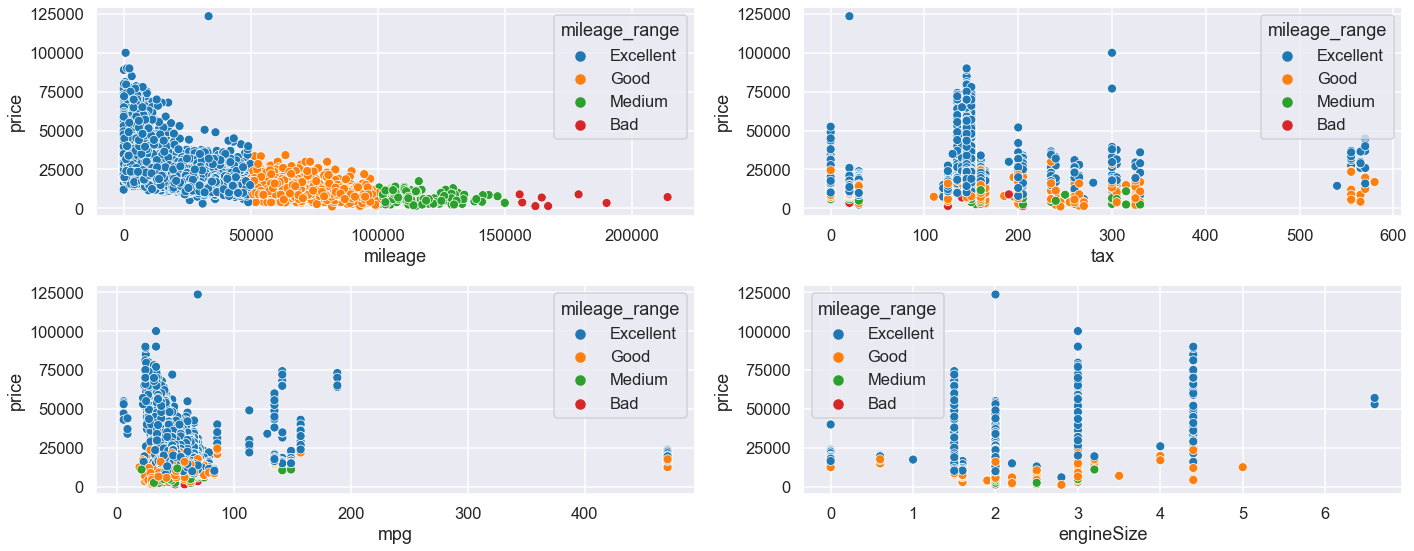

In [31]:
plt.figure(figsize=(20,8))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='mileage_range')
    
plt.tight_layout()   
plt.show()

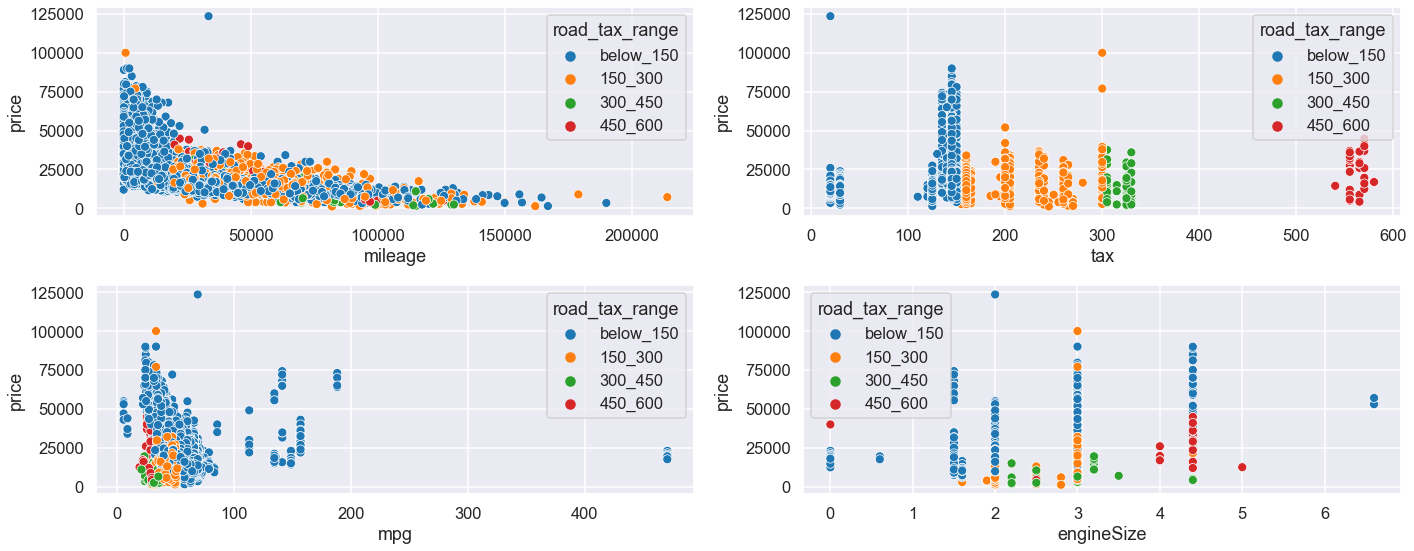

In [32]:
plt.figure(figsize=(20,8))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='road_tax_range')
    
plt.tight_layout()   
plt.show()

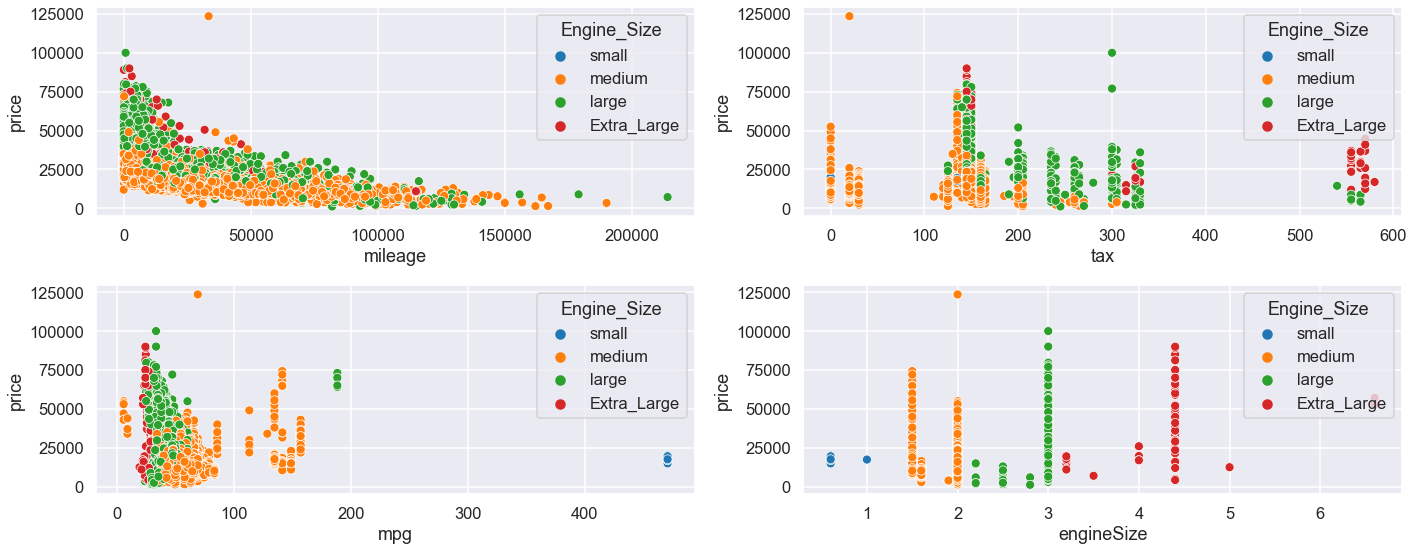

In [33]:
plt.figure(figsize=(20,8))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='Engine_Size')
    
plt.tight_layout()   
plt.show()

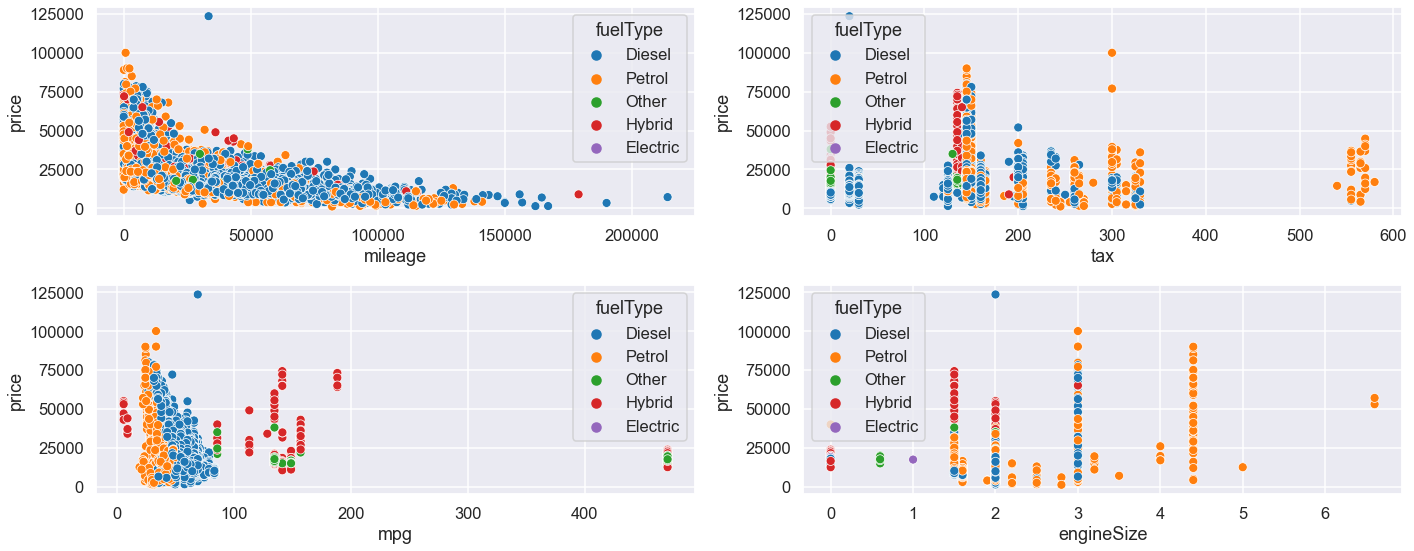

In [34]:
plt.figure(figsize=(20,8))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='fuelType')
    
plt.tight_layout()   
plt.show()

<ipython-input-35-5c2593e179f6>:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


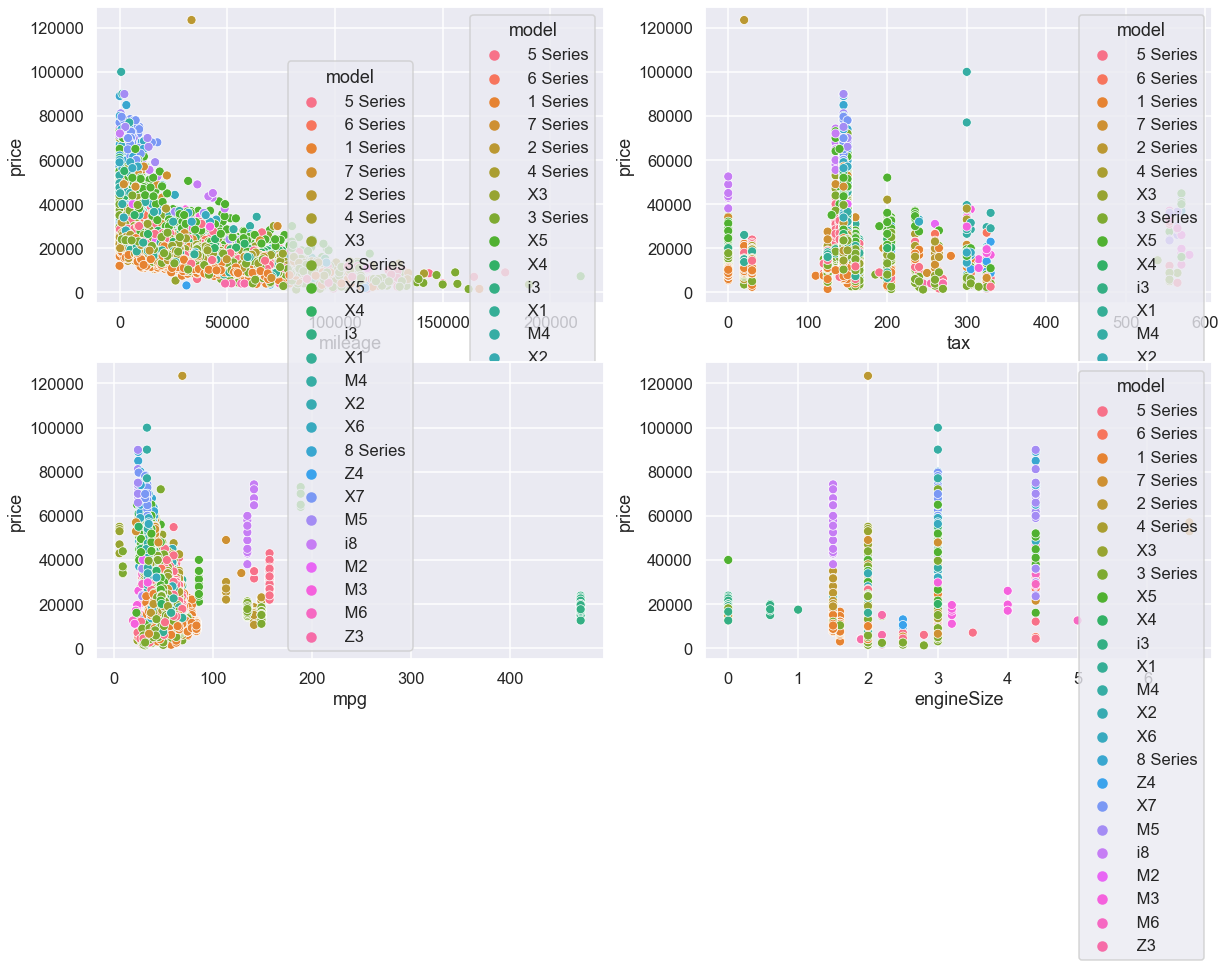

In [35]:
plt.figure(figsize=(20,12))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='model')
    
plt.tight_layout()   
plt.show()

In [36]:
def correlation_heatmap(df):
    """
    Creates a heatmap of the Pearson correlation coefficients
    Args:
        df (dataframe): sampled flight data
    Returns:
        heatmap
    """
    
    # find the Pearson correlation coefficients
    correlation_matrix = df.corr()

    # create a mask of lower triangular matrix
    mask = np.zeros_like(correlation_matrix)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (30,30))

    # create a heatmap of the correlation coefficients
    sns.heatmap(correlation_matrix, linewidths=0.2, 
                vmax=1.0, vmin=-1., 
                square=True, cmap='RdYlGn', 
                linecolor='white', mask = mask) #annot=True, 
    
    plt.title('Heatmap of the Pearson Correlation Coefficients')

In [37]:
# df = df.drop('model', axis=1)
# df = pd.get_dummies(df)
# display(df.columns)

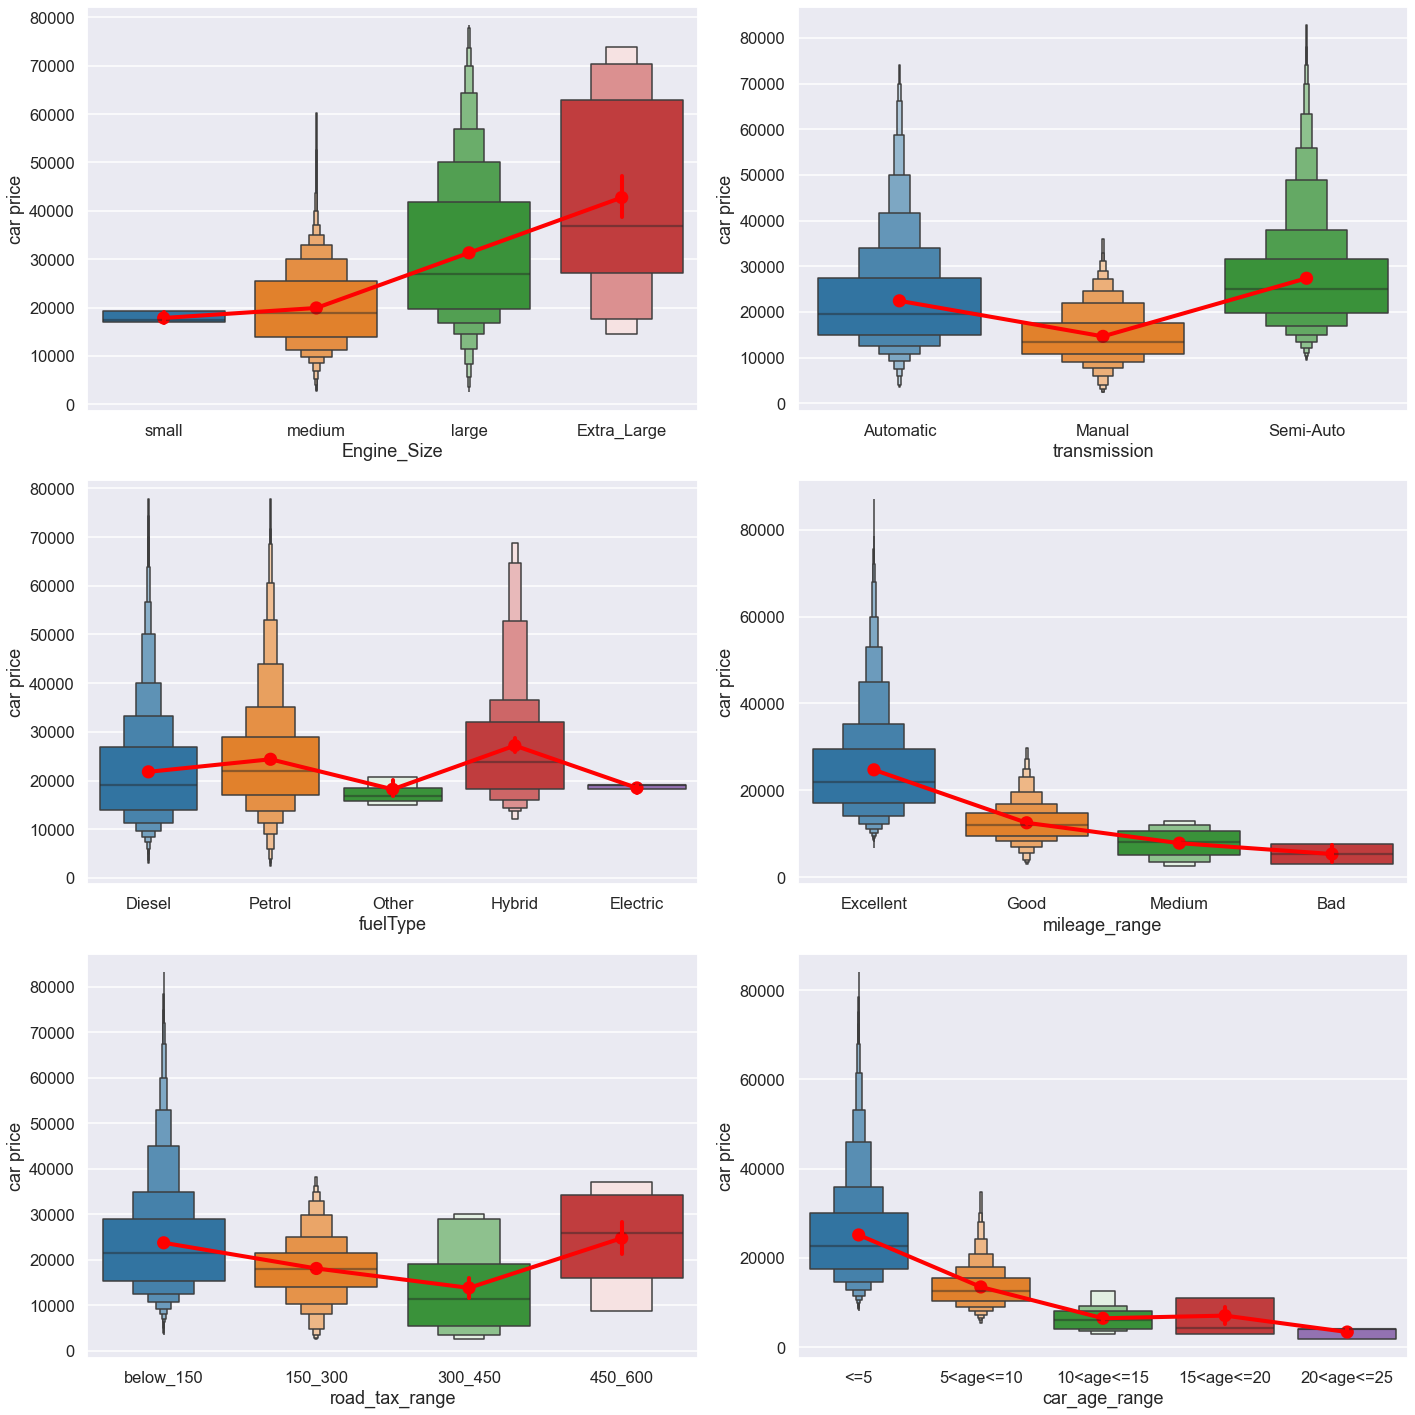

In [38]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
# sns.stripplot(x='Engine_Size', y='price', data=df)
sns.boxenplot(x='Engine_Size', y='price', data=df, showfliers=False)
sns.pointplot(x='Engine_Size', y='price', data=df, color='red')
plt.ylabel("car price")
# plt.title("box plot")

plt.subplot(3,2,2)
sns.boxenplot(x='transmission', y='price', data=df, showfliers=False)
sns.pointplot(x='transmission', y='price', data=df, color='red')
plt.ylabel("car price")
# plt.title("swarm plot on top of a box plot")

plt.subplot(3,2,3)
sns.boxenplot(x='fuelType', y='price', data=df, showfliers=False)
sns.pointplot(x='fuelType', y='price', data=df, color='red')
plt.ylabel("car price")
# plt.title("violin plot")

plt.subplot(3,2,4)
sns.boxenplot(x='mileage_range', y='price', data=df, showfliers=False)
sns.pointplot(x='mileage_range', y='price', data=df, color='red')
plt.ylabel("car price")
# plt.title("boxen plot")

plt.subplot(3,2,5)
sns.boxenplot(x='road_tax_range', y='price', data=df, showfliers=False)
sns.pointplot(x='road_tax_range', y='price', data=df, color='red')
plt.ylabel("car price")
# plt.title("boxen plot")

plt.subplot(3,2,6)
sns.boxenplot(x='car_age_range', y='price', data=df, showfliers=False)
sns.pointplot(x='car_age_range', y='price', data=df, color='red')
plt.ylabel("car price")
# plt.title("boxen plot")

plt.tight_layout()
plt.show()

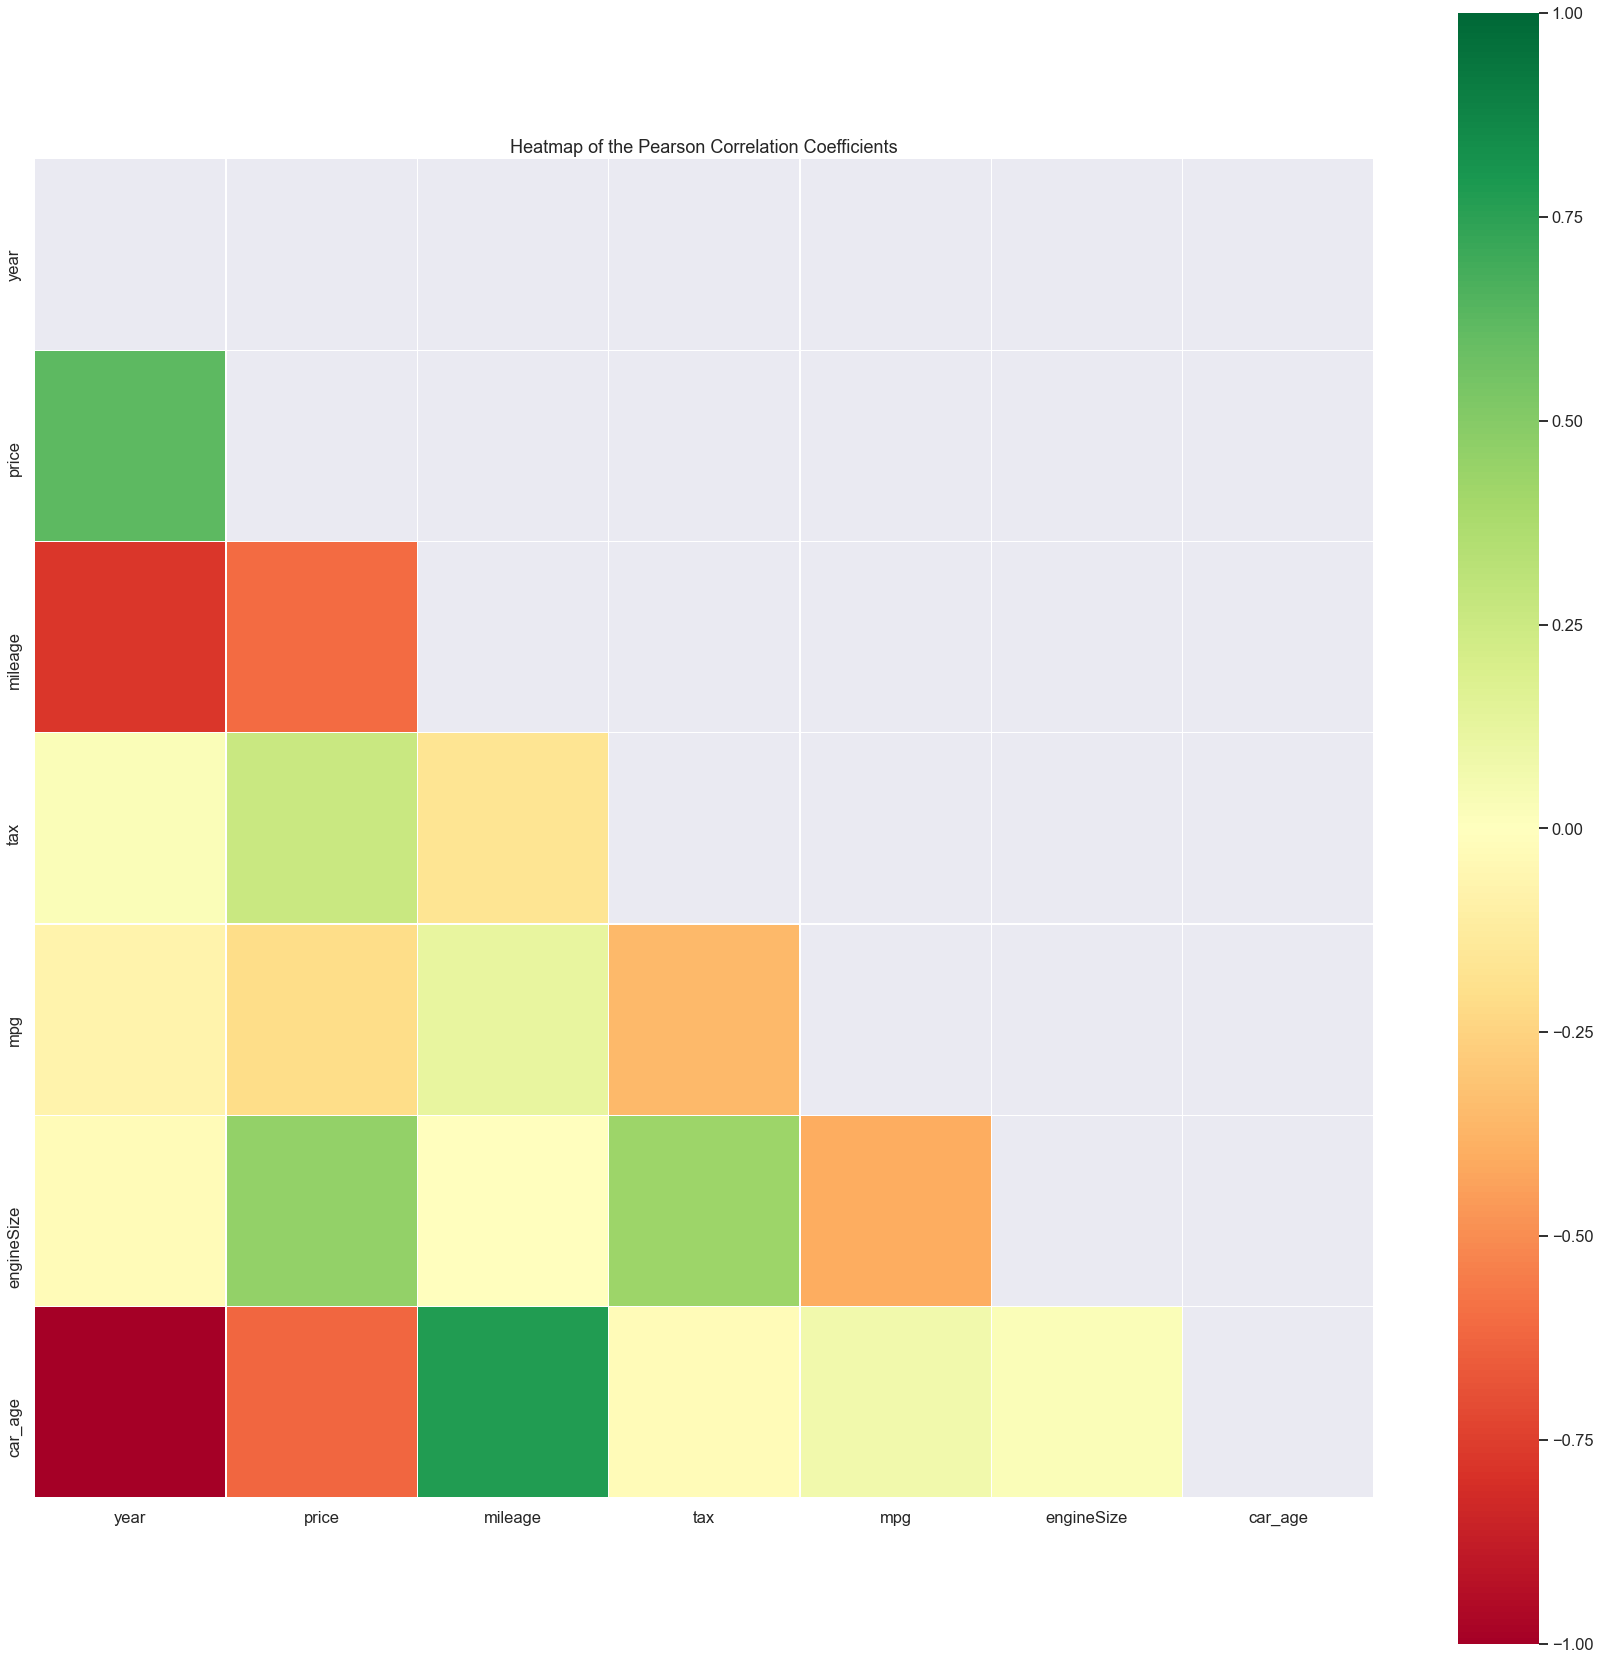

In [39]:
correlation_heatmap(df)

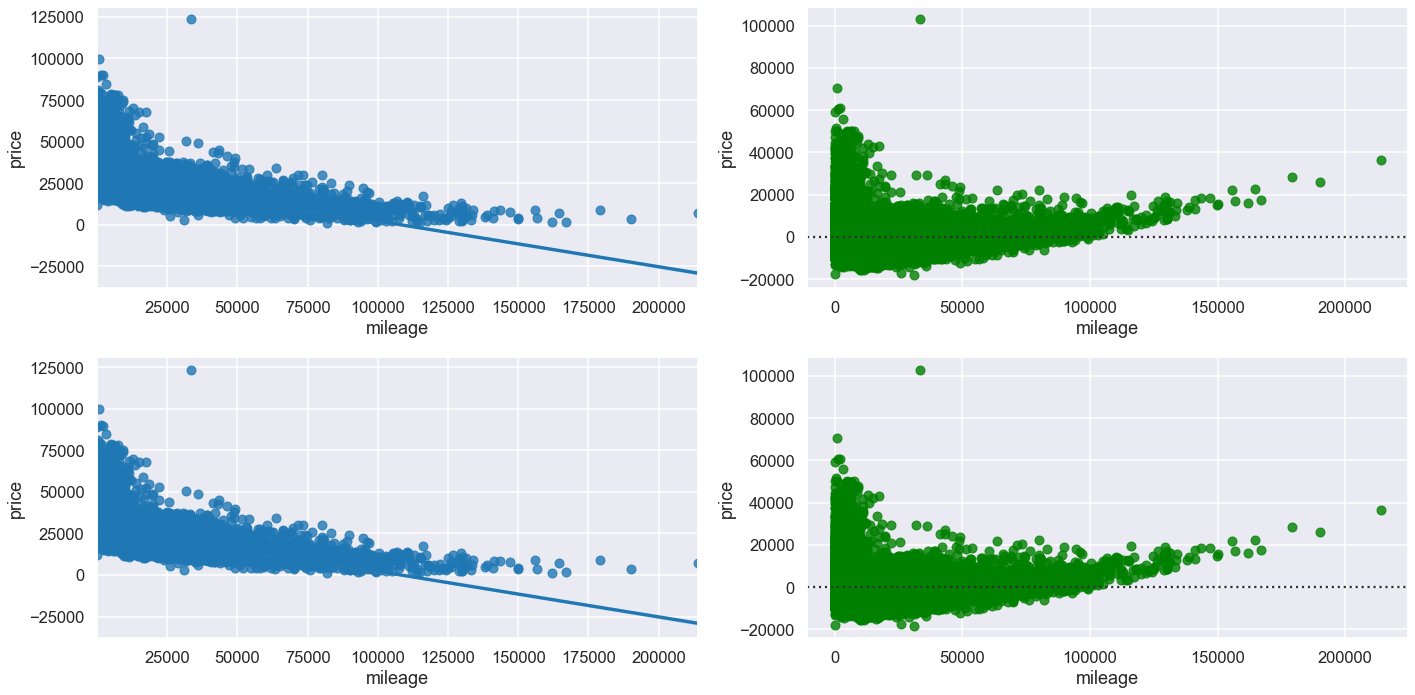

In [40]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.regplot(x='mileage', y='price', data=df)

plt.subplot(2,2,2)
sns.residplot(x='mileage', y='price', data=df, order=1, color='green')

plt.subplot(2,2,3)
sns.regplot(x='mileage', y='price', data=df)

plt.subplot(2,2,4)
sns.residplot(x='mileage', y='price', data=df, order=1, color='green')

plt.tight_layout()
plt.show()

In [41]:
# df = df.drop('model', axis=1)
df = pd.get_dummies(df)
display(df)

,year,price,mileage,tax,mpg,engineSize,car_age,model_ 1 Series,model_ 2 Series,model_ 3 Series,...,road_tax_range_450_600,mileage_range_Excellent,mileage_range_Good,mileage_range_Medium,mileage_range_Bad,car_age_range_<=5,car_age_range_5<age<=10,car_age_range_10<age<=15,car_age_range_15<age<=20,car_age_range_20<age<=25
0,2014,11200,67068,125,57.6,2.0,7,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,2018,27000,14827,145,42.8,2.0,3,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2016,16000,62794,160,51.4,3.0,5,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,2017,12750,26676,145,72.4,1.5,4,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,2014,14500,39554,160,50.4,3.0,7,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10776,2016,19000,40818,150,54.3,2.0,5,0,0,0,...,0,1,0,0,0,1,0,0,0,0
10777,2016,14600,42947,125,60.1,2.0,5,0,0,0,...,0,1,0,0,0,1,0,0,0,0
10778,2017,13100,25468,200,42.8,2.0,4,0,0,1,...,0,1,0,0,0,1,0,0,0,0
10779,2014,9930,45000,30,64.2,2.0,7,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      10781 non-null  int64  
 1   price                     10781 non-null  int64  
 2   mileage                   10781 non-null  int64  
 3   tax                       10781 non-null  int64  
 4   mpg                       10781 non-null  float64
 5   engineSize                10781 non-null  float64
 6   car_age                   10781 non-null  int64  
 7   model_ 1 Series           10781 non-null  uint8  
 8   model_ 2 Series           10781 non-null  uint8  
 9   model_ 3 Series           10781 non-null  uint8  
 10  model_ 4 Series           10781 non-null  uint8  
 11  model_ 5 Series           10781 non-null  uint8  
 12  model_ 6 Series           10781 non-null  uint8  
 13  model_ 7 Series           10781 non-null  uint8  
 14  model_

In [43]:
df.to_csv("bmw_used_cars.csv", index=False)